# SUMMER ANALYTICS 2024

## WEEK-4 ASSIGNMENT

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [7]:
# Read the csv file as data
df = pd.read_csv('car_evaluation.csv')

# you may print first few rows
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [8]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [9]:
# view dimensions of dataset
df.shape

(1727, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables:
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [12]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [13]:
# check missing values in variables
#write your code here


**Declare feature vector and target variable**

In [14]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [15]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# check the shape of X_train and X_test
X_train.shape

(1157, 6)

In [17]:
X_test.shape

(570, 6)

In [18]:
X_train

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low
...,...,...,...,...,...,...
1130,med,med,3,more,big,low
1294,med,low,5more,more,big,high
860,high,low,5more,more,big,low
1459,low,high,4,2,small,high


In [19]:
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [20]:
type(X_train.buying)

pandas.core.series.Series

In [21]:
X_train.buying

83      vhigh
48      vhigh
468      high
155     vhigh
1043      med
        ...  
1130      med
1294      med
860      high
1459      low
1126      med
Name: buying, Length: 1157, dtype: object

Feature Engineering

In [22]:
type(X_train.buying[83])

str

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [23]:
# check data types in X_train
type(X_train.buying[83])

str

Encode categorical variables
Now, I will encode the categorical variables.

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


We can see that all the variables are ordinal categorical data type.



In [25]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

Encode y_train and y_test similarly.(You might have to convert the Series object to a 1D array first.)

In [26]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [28]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [29]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[ 26   0  98   3]
 [  2   0  16   0]
 [ 26   0 371   2]
 [ 14   0  11   1]]
Accuracy for Logistic Regression : 0.69825 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [30]:
# AdaBoostClassifier
#YOUR CODE HERE

adb_clf = AdaBoostClassifier(n_estimators = 1000, random_state = 0)
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=0)

In [31]:
# Random Forest
#YOUR CODE HERE

rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state = 0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [32]:
# Naive Bayes: GaussianNB
#YOUR CODE

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [33]:
# KNN: KNeighborsClassifier
#YOUR CODE HERE

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# Decision Tree: DecisionTreeClassifier
#YOUR CODE HERE

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Visualize decision-trees

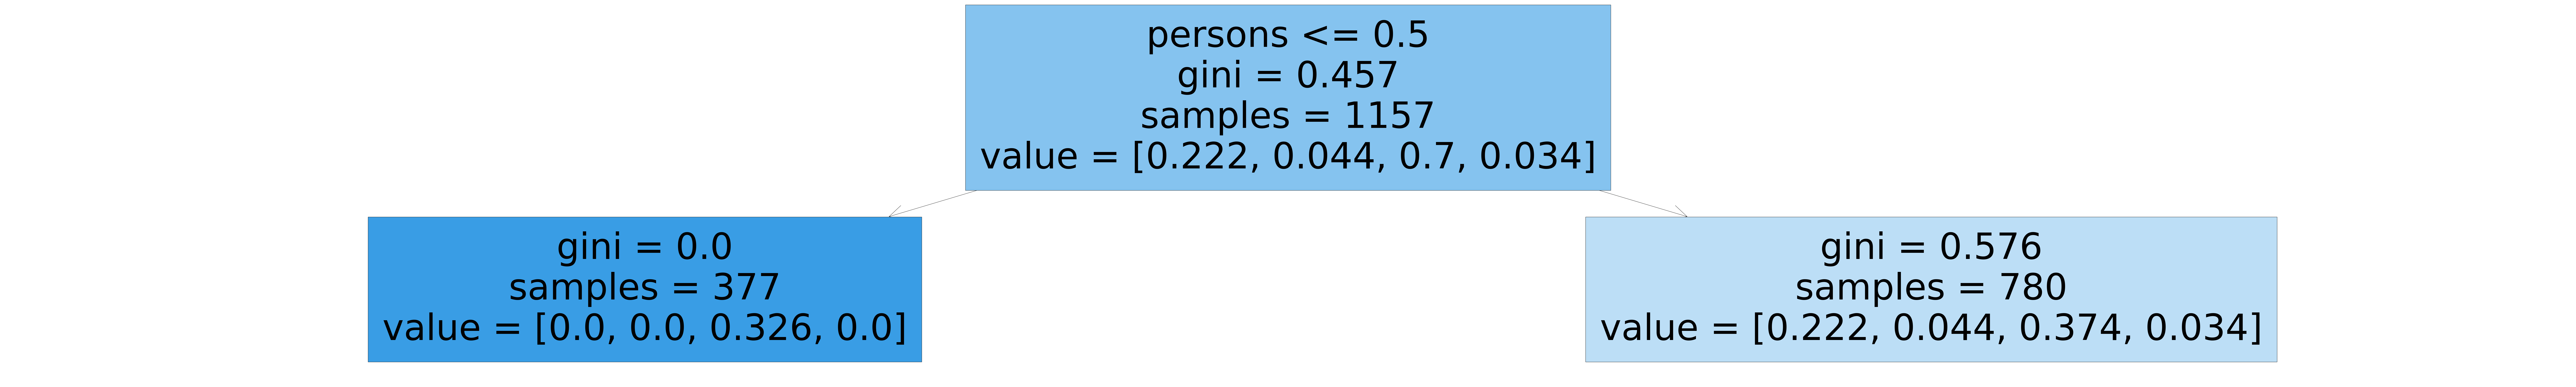

In [35]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(adb_clf.estimators_[0], filled=True, feature_names = X.columns)
plt.show()

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

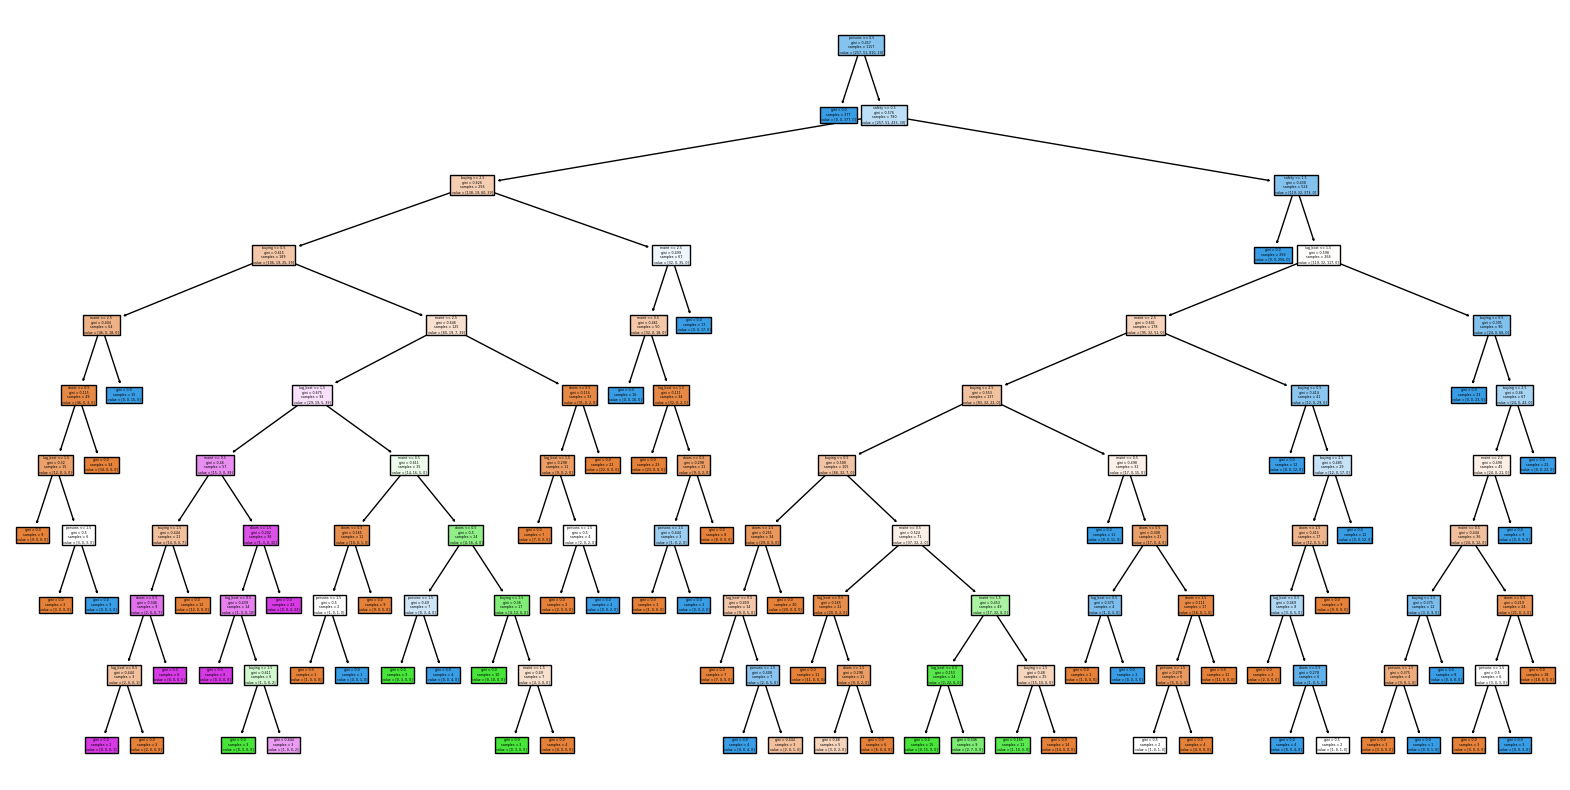

In [36]:
from sklearn import tree

# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()

Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

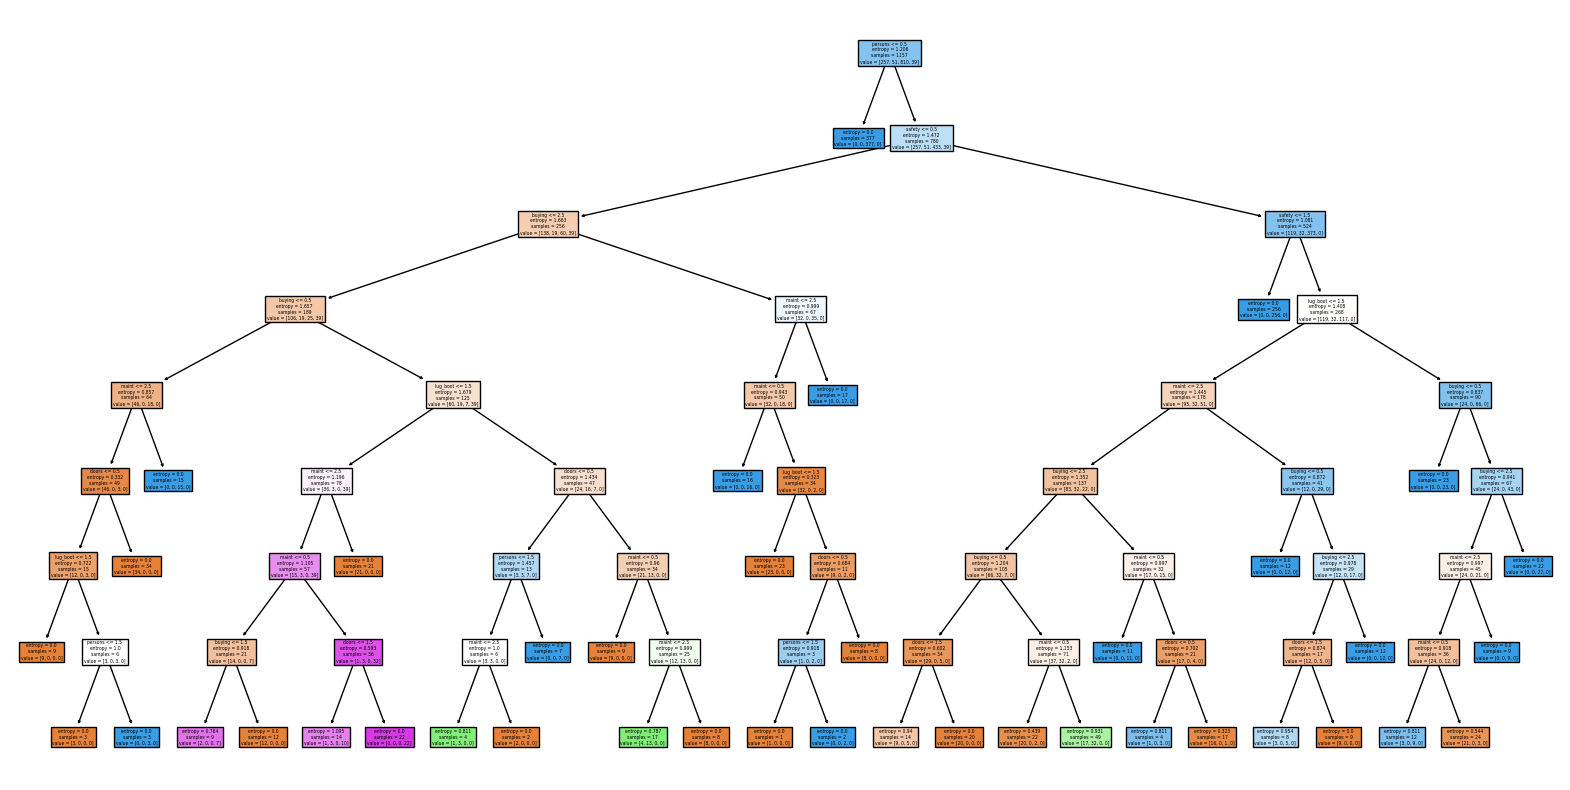

In [37]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()


Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.92      0.80      0.86        15
           2       1.00      1.00      1.00       237
           3       0.81      1.00      0.89        17

    accuracy                           0.99       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.99      0.99      0.99       346



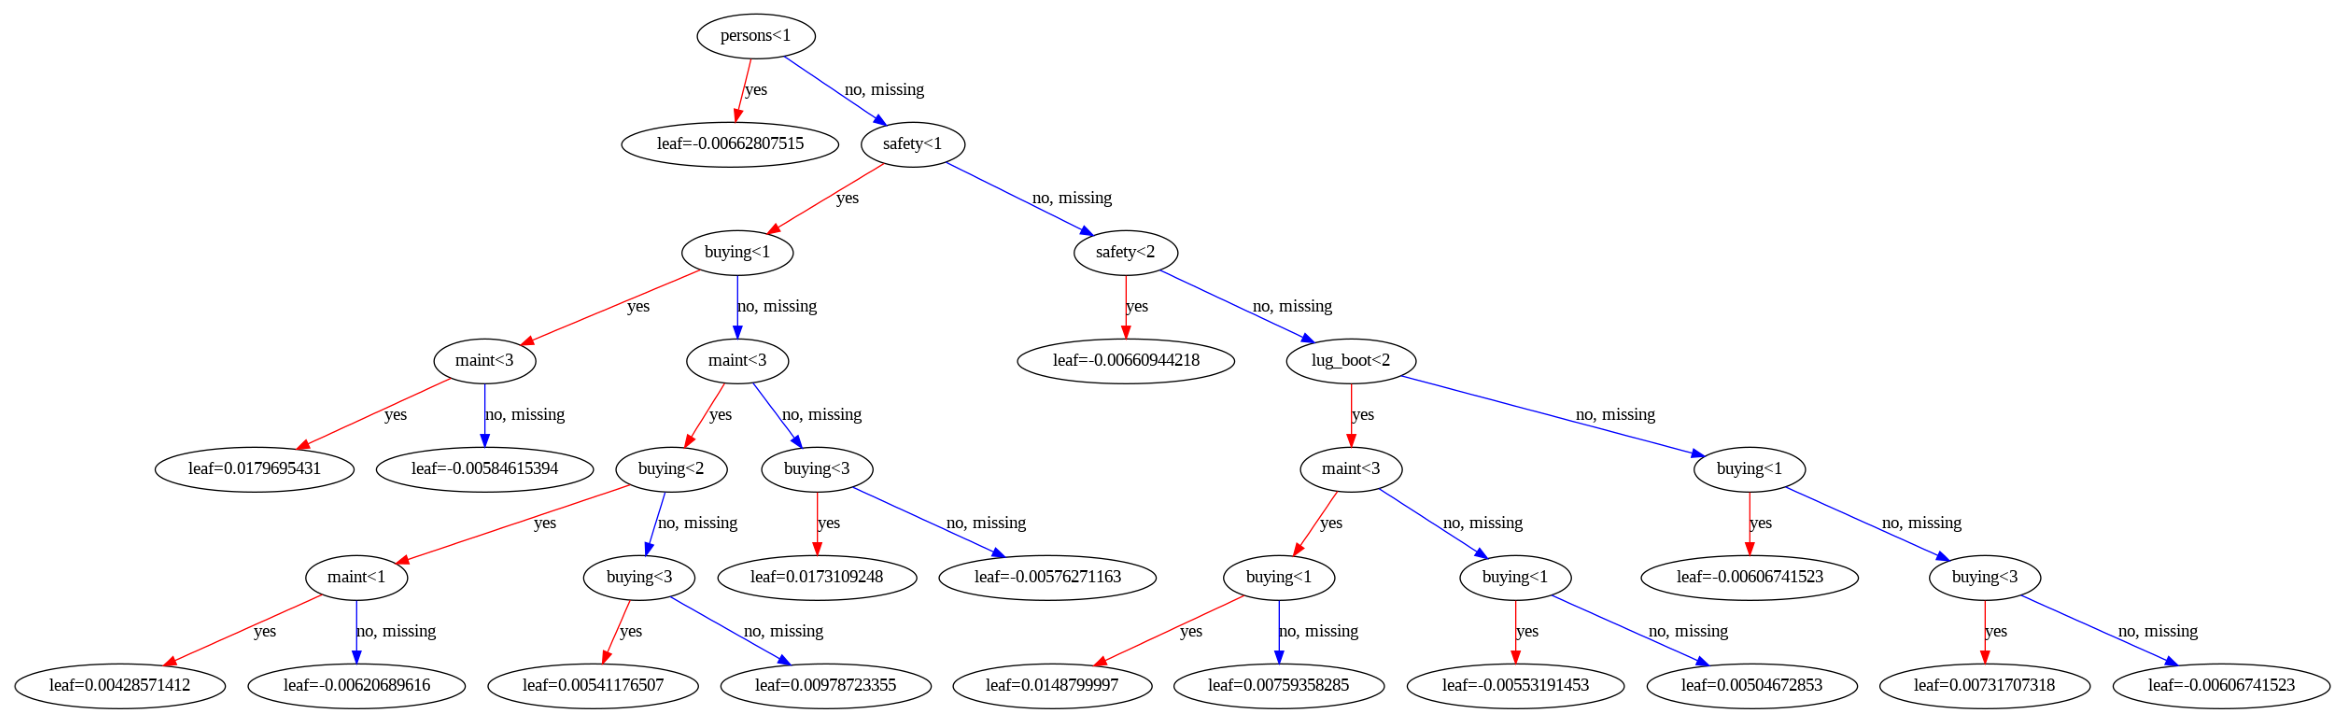

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_tree

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Encode categorical variables
label_encoders = {}
for col in col_names:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot one of the trees from the trained XGBoost model
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_clf, num_trees=0, ax=ax)
plt.show()


Visualize XGBClassifier

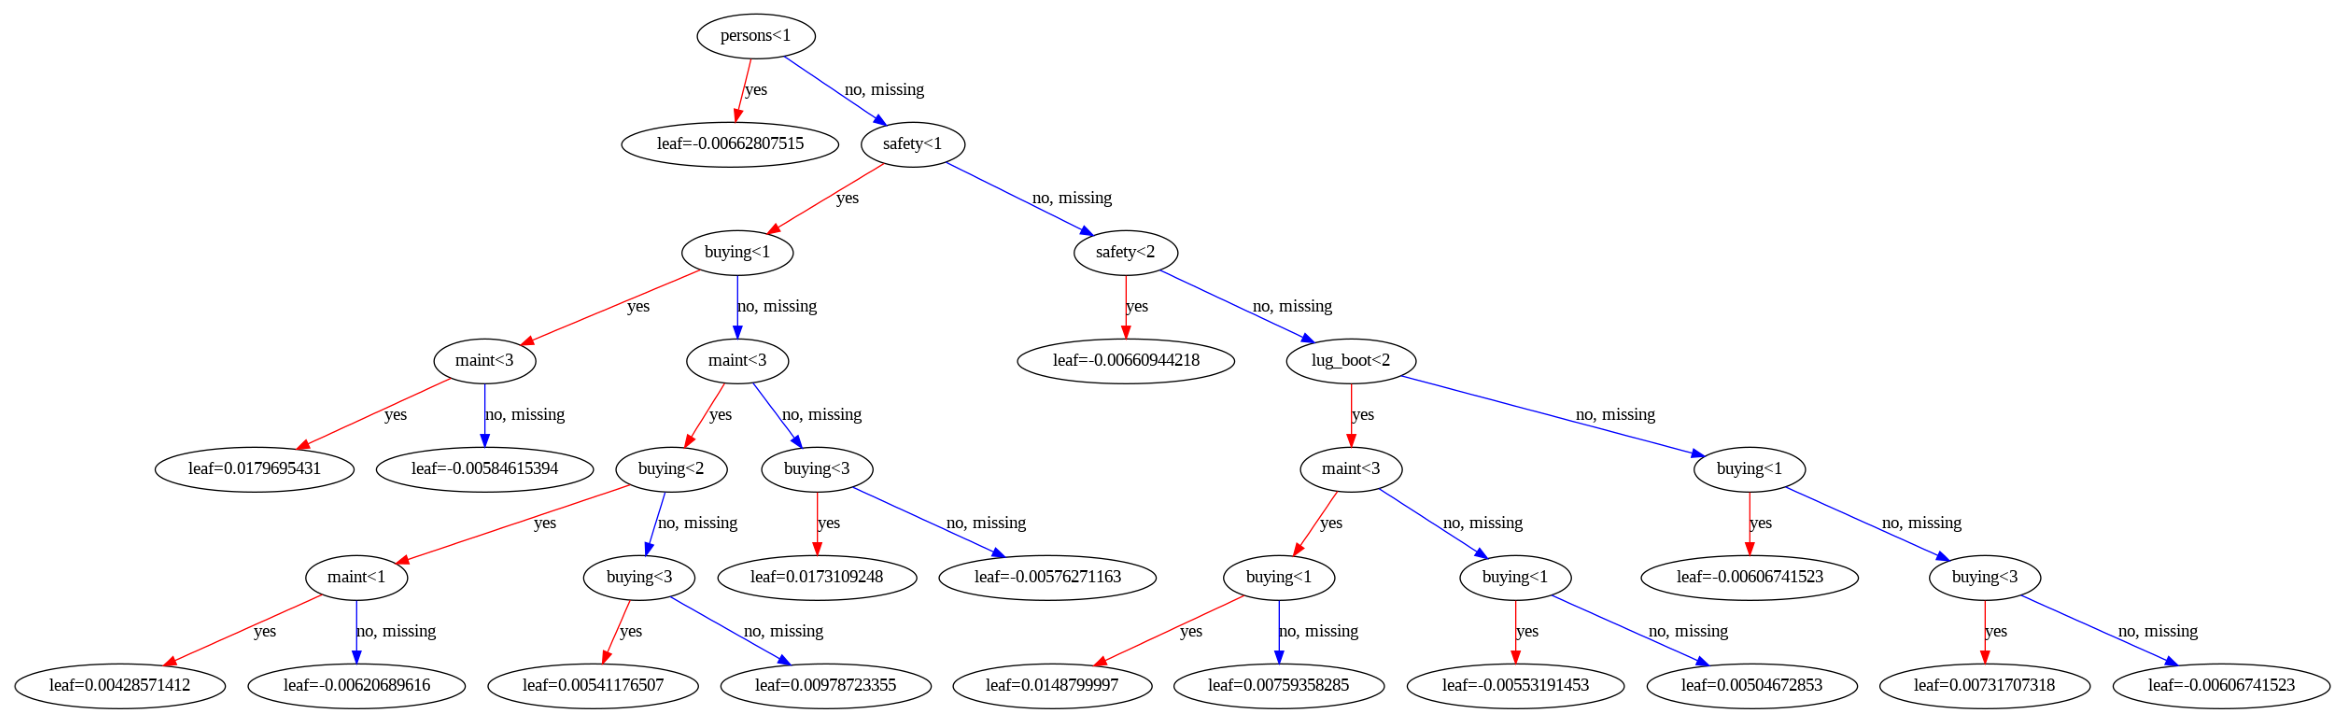

In [42]:
# from xgboost import plot_tree
# fig, ax = plt.subplots(figsize=(30, 30))
# #change the model name
# plot_tree("model_name", ax=ax)
# plt.show()

# Initialize and train the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Plot one of the trees from the trained XGBoost model
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_clf, num_trees=0, ax=ax)
plt.show()


Now, heres a task for you. Try XGBRFClassifier on your own.

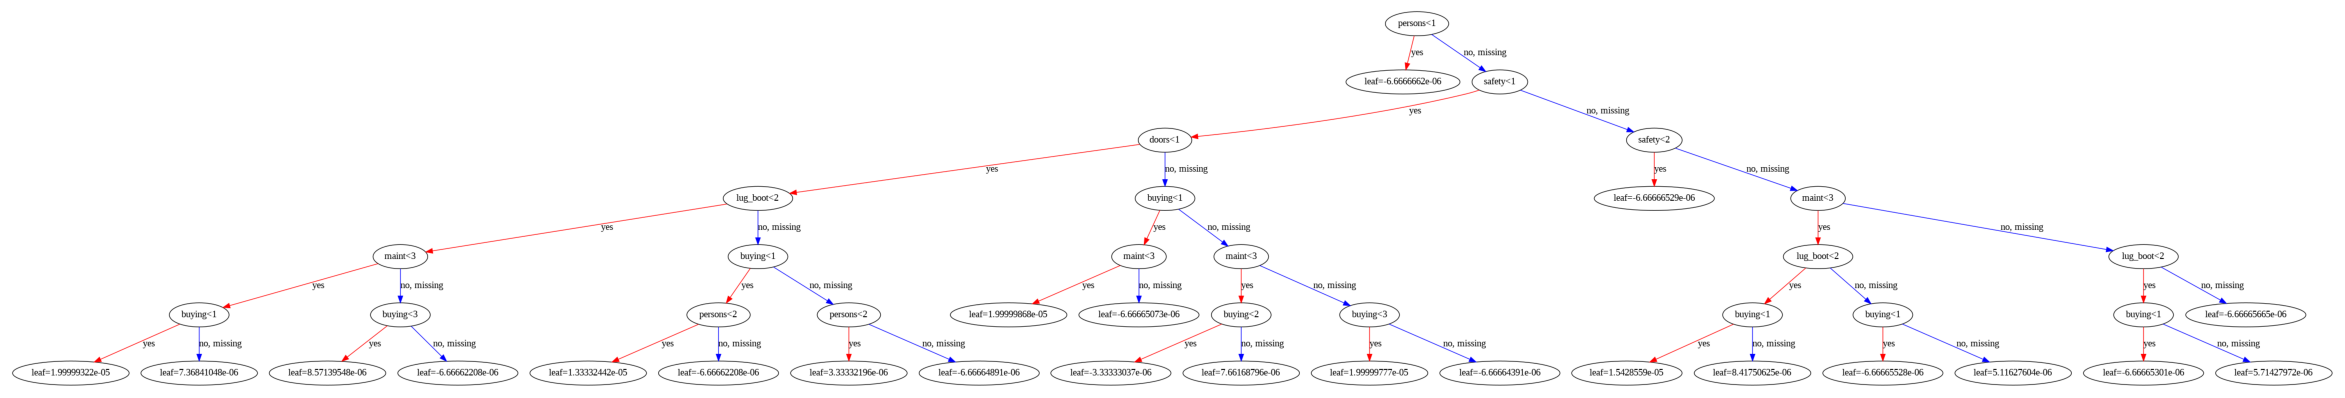

In [43]:
# XGBRFClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBRFClassifier, plot_tree

# Initialize and train the XGBRFClassifier
xgbrf_clf = XGBRFClassifier(n_estimators=1000, learning_rate=0.01, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgbrf_clf.fit(X_train, y_train)

# Plot one of the trees from the trained XGBRFClassifier
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgbrf_clf, num_trees=0, ax=ax)
plt.show()


Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

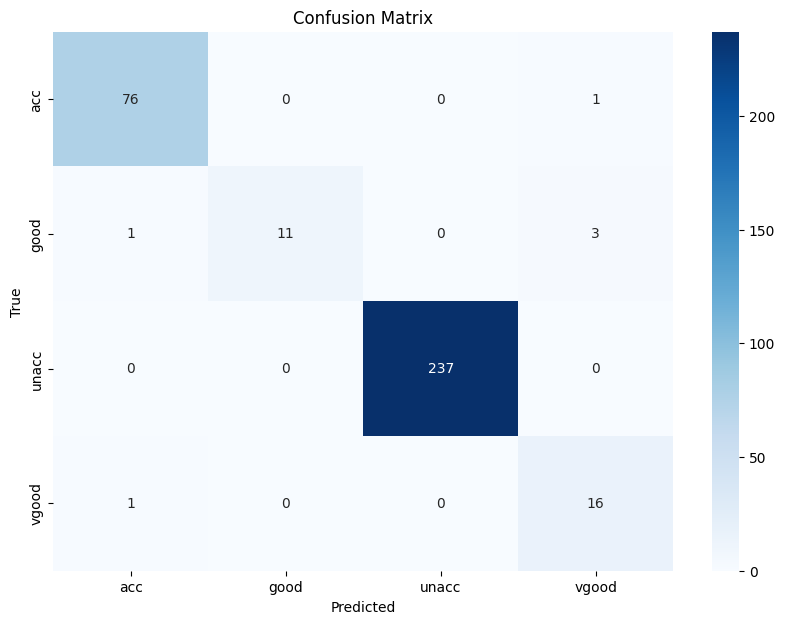

In [53]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       1.00      0.73      0.85        15
           2       1.00      1.00      1.00       237
           3       0.80      0.94      0.86        17

    accuracy                           0.98       346
   macro avg       0.94      0.92      0.92       346
weighted avg       0.98      0.98      0.98       346



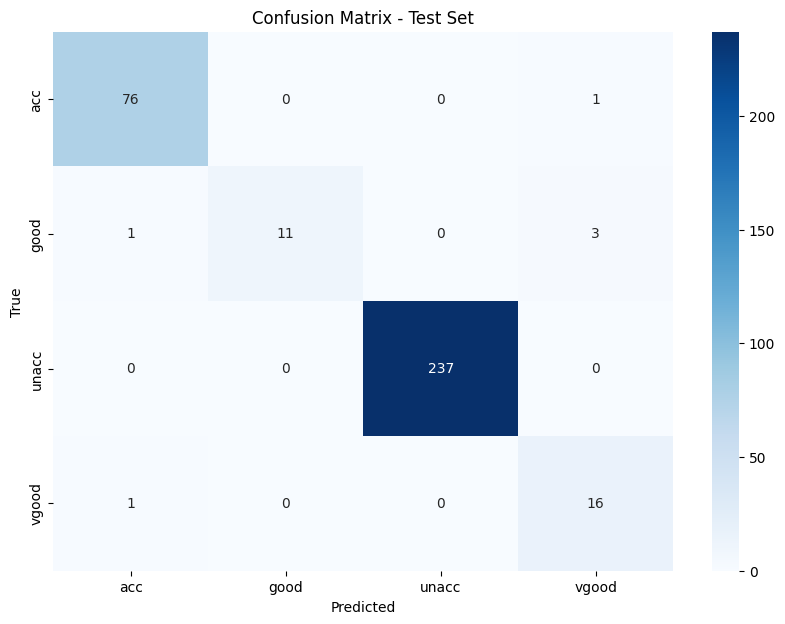

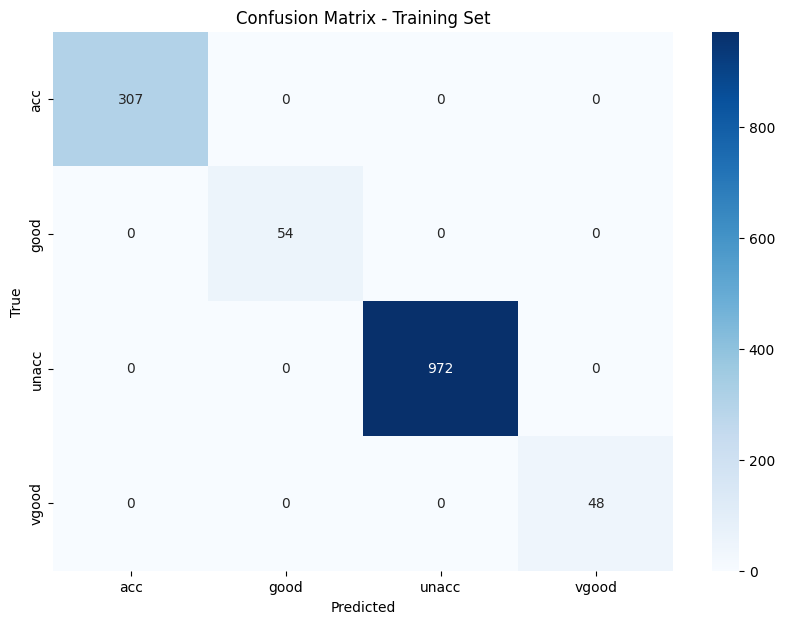

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Encode categorical variables
label_encoders = {}
for col in col_names:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Make predictions on the training set
y_train_pred = xgb_clf.predict(X_train)

# Plot confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Set')
plt.show()


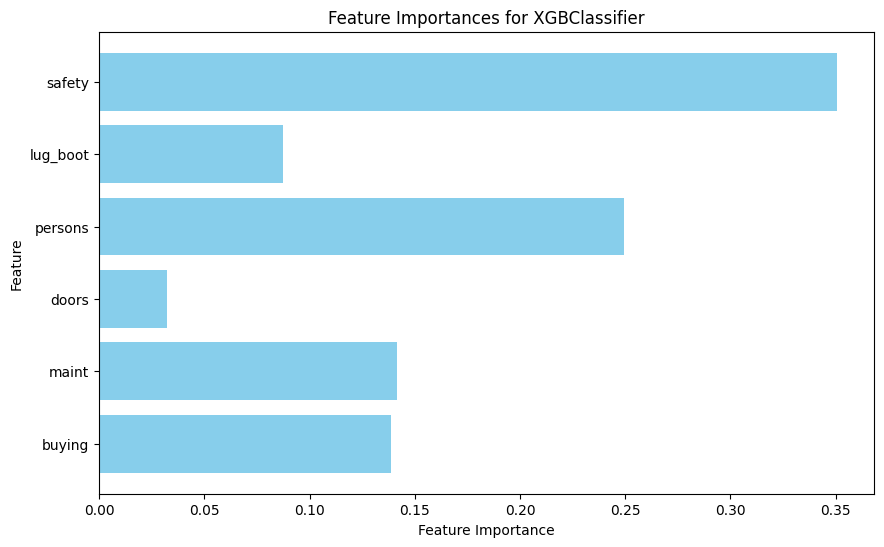

In [49]:
# Cell to find Feature Importance
#YOUR CODE HERE

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

feature_importances = xgb_clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for XGBClassifier')
plt.show()

**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.99      0.98        77
        good       1.00      0.73      0.85        15
       unacc       1.00      1.00      1.00       237
       vgood       0.80      0.94      0.86        17

    accuracy                           0.98       346
   macro avg       0.94      0.92      0.92       346
weighted avg       0.98      0.98      0.98       346



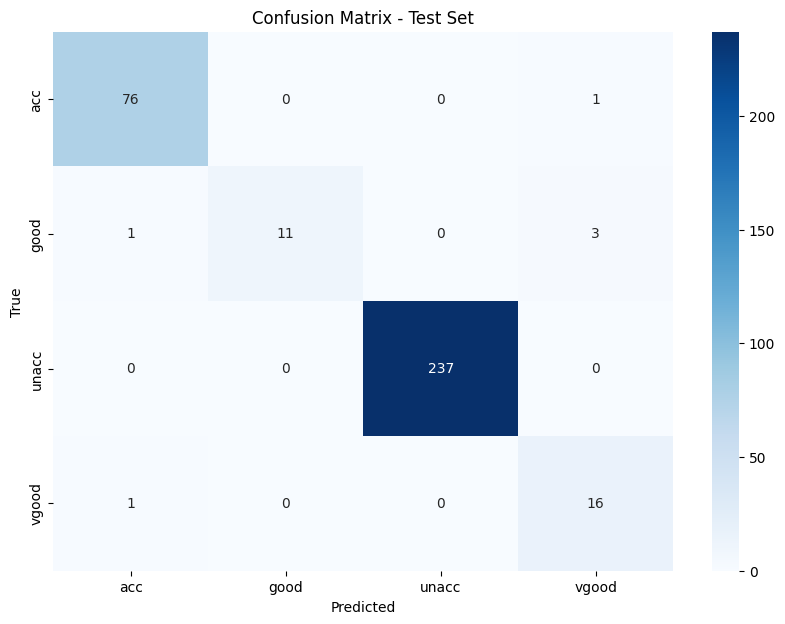

In [54]:
#YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Encode categorical variables
label_encoders = {}
for col in col_names:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoders['class'].classes_))

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Encode categorical variables
label_encoders = {}
for col in col_names:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoders['class'].classes_))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.99      0.98        77
        good       1.00      0.73      0.85        15
       unacc       1.00      1.00      1.00       237
       vgood       0.80      0.94      0.86        17

    accuracy                           0.98       346
   macro avg       0.94      0.92      0.92       346
weighted avg       0.98      0.98      0.98       346



In [60]:
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=0, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoders['class'].classes_))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         acc       1.00      0.97      0.99        77
        good       0.92      0.80      0.86        15
       unacc       1.00      1.00      1.00       237
       vgood       0.81      1.00      0.89        17

    accuracy                           0.99       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.99      0.99      0.99       346



In [57]:
xgb_clf.score

<bound method ClassifierMixin.score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)>

In [65]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [67]:
adb_clf = AdaBoostClassifier(n_estimators = 1000, random_state = 0)
adb_clf.fit(X_train, y_train)

y_pred = adb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [71]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


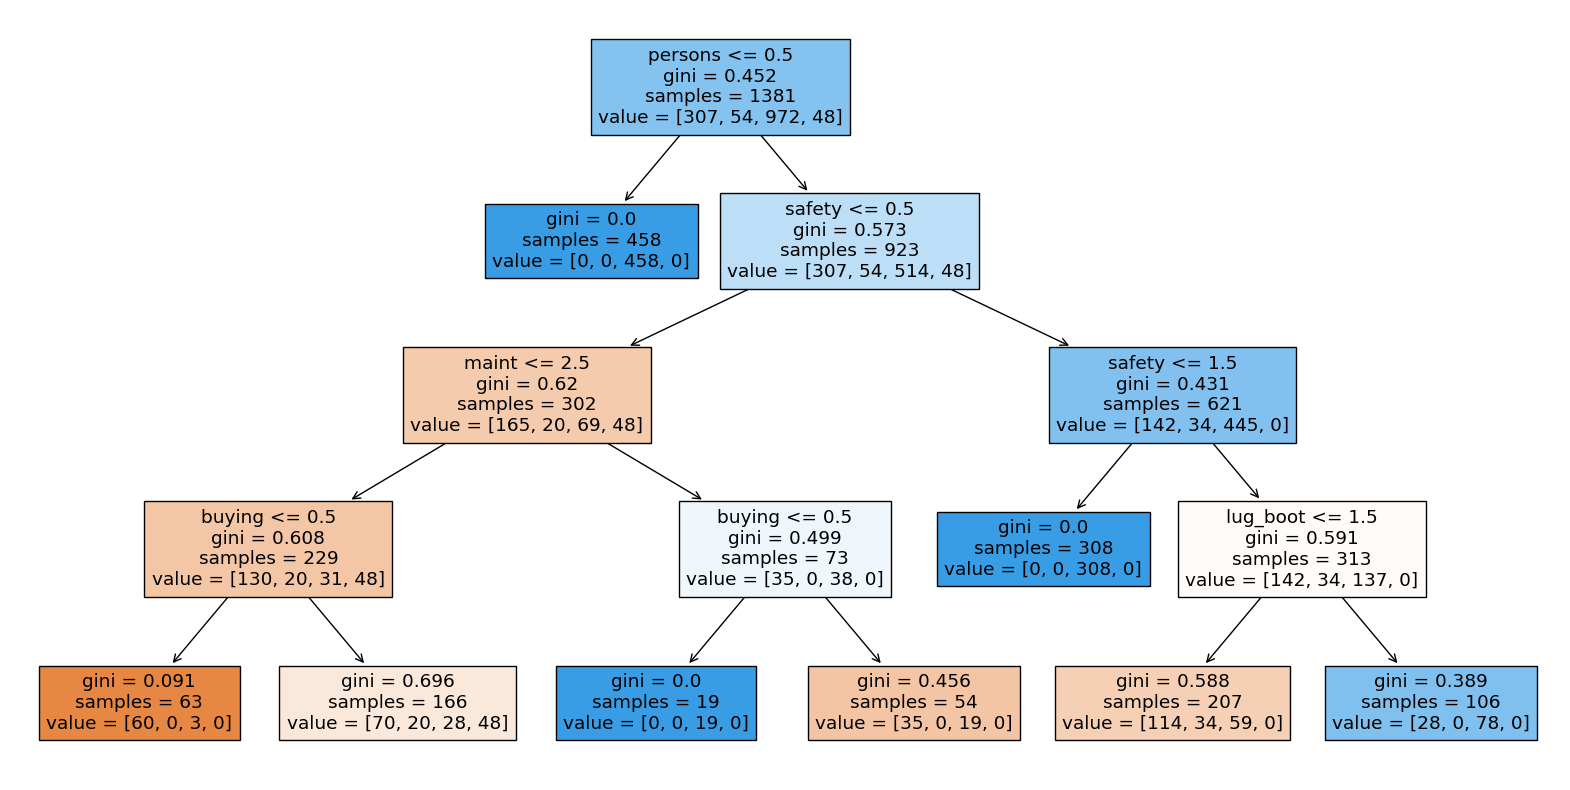

In [72]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()

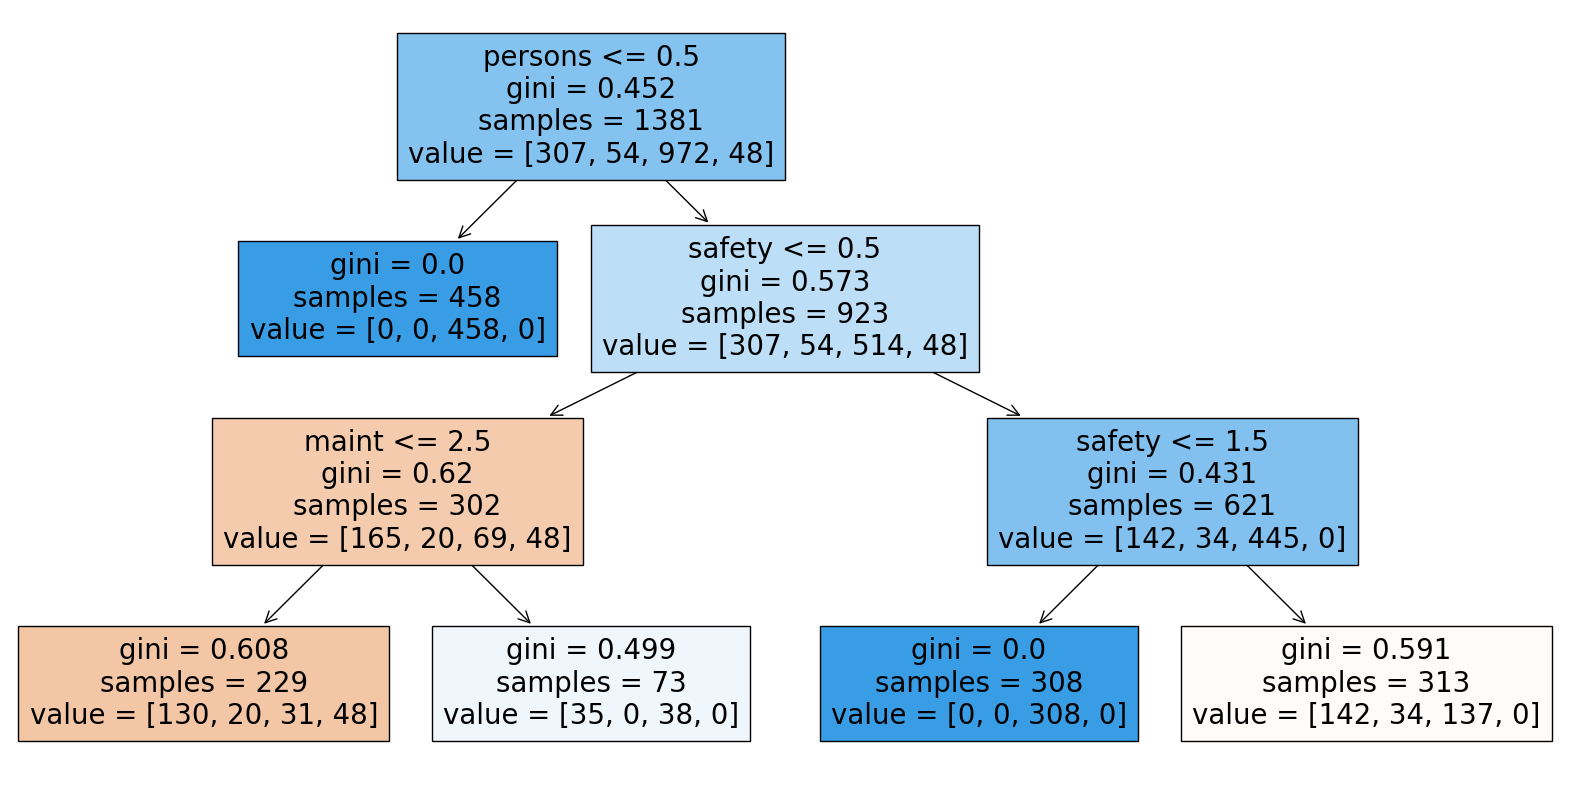

In [73]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()

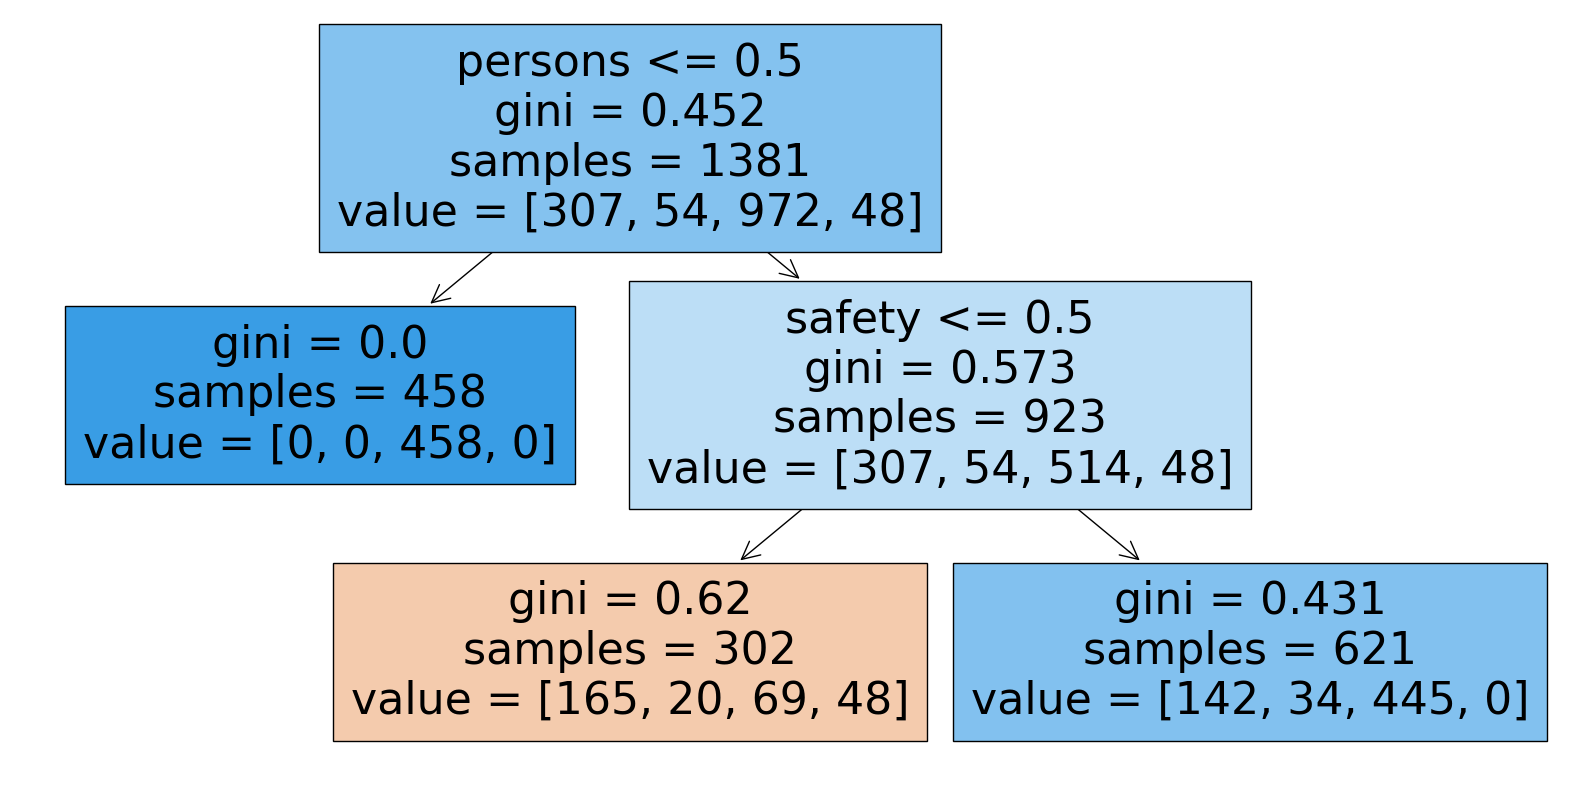

In [74]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()

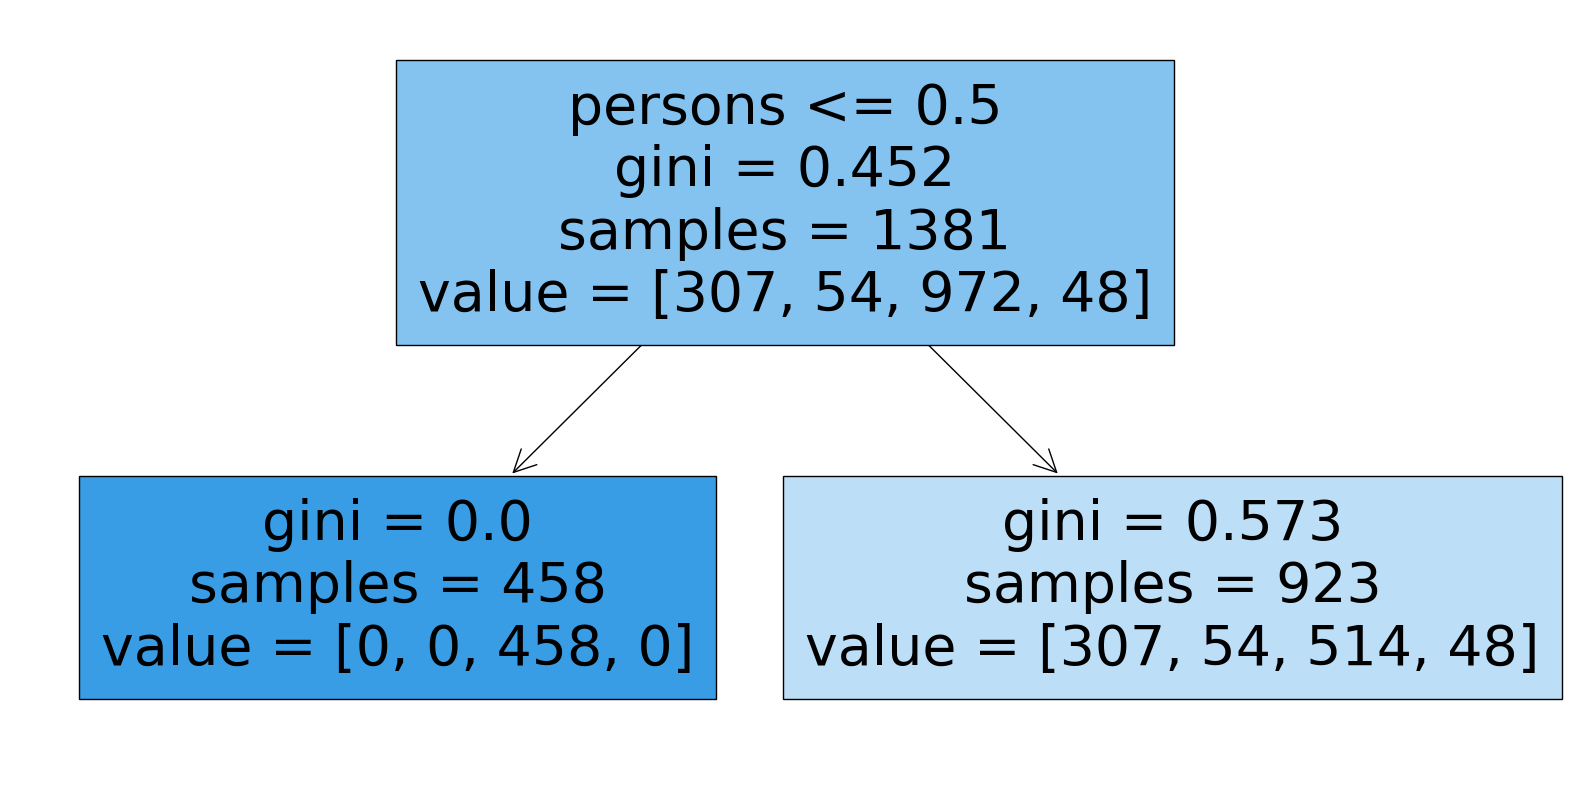

In [75]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)
plt.show()